# Exploring raw data (step 1)

In [1]:
"""
NOTE: to run notebook use: venv/bin/python manage.py shell_plus --notebook
"""

MYPROJECT='/Users/erotundo/PycharmProjects/DatasetAnnotatorProj'
import os, sys
sys.path.insert(0, MYPROJECT)
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "local_settings.py")

import django
django.setup()

from django.conf import settings
from DatasetAnnotator.models import Posts, Users
from django.db.models import Q, F
from django.db.models import Count, Sum, Max, Avg
from django.db.models import When, Case, Value
from django.db.models import IntegerField, FloatField
import numpy as np
import pandas as pd
from django.db.models.functions import Greatest, Coalesce

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# community selection
db = 'travel'


# plotting settings
sns.set(style="white", palette="muted", color_codes=True)
PLOTS_PATH = 'output/' + db + '/'
PLOTS_FORMATS = ['.pdf', '.png']

# Figures

In [2]:
print db

# time span
print "\nEarliest question posted: {}".format(Posts.objects.using(db).filter(posttypeid=1).order_by('creationdate').values_list('creationdate')[0])
print "Latest question posted: {}".format(Posts.objects.using(db).filter(posttypeid=1).order_by('-creationdate').values_list('creationdate')[0])

print "\nNr. of questions: {}".format(Posts.objects.using(db).filter(posttypeid=1).count())
print "Nr. of answered questions: {}".format(Posts.objects.using(db).filter(posttypeid=1).filter(answercount__gt=0).count())
print "Nr. of unanswered questions: {}".format(Posts.objects.using(db).filter(posttypeid=1).filter(answercount=0).count())

print "\nNr. of answered questions without a BestAnswer: {}".format(Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=True).count())
print "Nr. of answered questions without a BestAnswer with = 1 answer: {}".format(Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=True).filter(answercount=1).count())
print "Nr. of answered questions without a BestAnswer with > 1 answers: {}".format(Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=True).filter(answercount__gt=1).count())
print "Nr. of answered questions without a BestAnswer with > 2 answers: {}".format(Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=True).filter(answercount__gt=2).count())
print "Nr. of answered questions without a BestAnswer with > 3 answers: {}".format(Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=True).filter(answercount__gt=3).count())
print "Nr. of answered questions without a BestAnswer with > 4 answers: {}".format(Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=True).filter(answercount__gt=4).count())
print "Nr. of answered questions without a BestAnswer with > 5 answers: {}".format(Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=True).filter(answercount__gt=5).count())
print "Nr. of answered questions without a BestAnswer with > 10 answers: {}".format(Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=True).filter(answercount__gt=10).count())

print "\nNr. of answered questions with a BestAnswer: {}".format(Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=False).count())
print "Nr. of answered questions with a BestAnswer with = 1 answer: {}".format(Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=False).filter(answercount=1).count())
print "Nr. of answered questions with a BestAnswer with > 1 answers: {}".format(Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=False).filter(answercount__gt=1).count())
print "Nr. of answered questions with a BestAnswer with > 2 answers: {}".format(Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=False).filter(answercount__gt=2).count())
print "Nr. of answered questions with a BestAnswer with > 3 answers: {}".format(Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=False).filter(answercount__gt=3).count())
print "Nr. of answered questions with a BestAnswer with > 4 answers: {}".format(Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=False).filter(answercount__gt=4).count())
print "Nr. of answered questions with a BestAnswer with > 5 answers: {}".format(Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=False).filter(answercount__gt=5).count())
print "Nr. of answered questions with a BestAnswer with > 10 answers: {}".format(Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=False).filter(answercount__gt=10).count())

print "\nNr. of answers: {}".format(Posts.objects.using(db).filter(posttypeid=2).count())
print "Nr. of unique users: {}".format(Users.objects.using(db).values('id').distinct().count())
print "Nr. of unique users2: {}".format(Posts.objects.using(db).values('owneruserid').distinct().count())
print "Nr. of unique askers: {}".format(Posts.objects.using(db).filter(posttypeid=1).values('owneruserid').distinct().count())
print "Nr. of unique answerers: {}".format(Posts.objects.using(db).filter(posttypeid=2).values('owneruserid').distinct().count())

travel

Earliest question posted: (datetime.datetime(2011, 6, 21, 20, 19, 35, tzinfo=<UTC>),)
Latest question posted: (datetime.datetime(2016, 9, 3, 22, 54, 40, tzinfo=<UTC>),)

Nr. of questions: 19279
Nr. of answered questions: 17360
Nr. of unanswered questions: 1919

Nr. of answered questions without a BestAnswer: 10306
Nr. of answered questions without a BestAnswer with = 1 answer: 5214
Nr. of answered questions without a BestAnswer with > 1 answers: 3173
Nr. of answered questions without a BestAnswer with > 2 answers: 1200
Nr. of answered questions without a BestAnswer with > 3 answers: 535
Nr. of answered questions without a BestAnswer with > 4 answers: 262
Nr. of answered questions without a BestAnswer with > 5 answers: 146
Nr. of answered questions without a BestAnswer with > 10 answers: 15

Nr. of answered questions with a BestAnswer: 8973
Nr. of answered questions with a BestAnswer with = 1 answer: 4168
Nr. of answered questions with a BestAnswer with > 1 answers: 4805
Nr. of 

# Nr. Questions per month (with VS without BestAnswer)

<QuerySet [(2011, 202), (2012, 445), (2013, 982), (2014, 1989), (2015, 2690), (2016, 2079)]>
<QuerySet [(2011, 870), (2012, 1352), (2013, 1395), (2014, 1712), (2015, 2018), (2016, 1626)]>


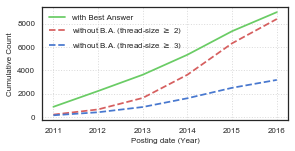

In [3]:
from django.db import models
from django.db.models import Func

class Year(Func):
    function = 'EXTRACT'
    template = '%(function)s(YEAR from %(expressions)s)'
    output_field = models.IntegerField()

# nr questions without BestAnswer for each month    
unresolved_q_peryear = Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=True).filter(answercount__gte=1).annotate(year=Year('creationdate')).values('year').annotate(count=Count('year')).values_list('year', 'count')
unresolved_q_peryear2 = Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=True).filter(answercount__gte=2).annotate(year=Year('creationdate')).values('year').annotate(count=Count('year')).values_list('year', 'count')
unresolved_q_peryear3 = Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=True).filter(answercount__gte=3).annotate(year=Year('creationdate')).values('year').annotate(count=Count('year')).values_list('year', 'count')
unresolved_q_peryear4 = Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=True).filter(answercount__gte=4).annotate(year=Year('creationdate')).values('year').annotate(count=Count('year')).values_list('year', 'count')
resolved_q_peryear = Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=False).filter(answercount__gte=1).annotate(year=Year('creationdate')).values('year').annotate(count=Count('year')).values_list('year', 'count')

print unresolved_q_peryear
print resolved_q_peryear


fig = plt.figure(figsize=(4, 2))
ax1 = fig.add_subplot(111)

ax1.plot([i[0] for i in resolved_q_peryear], 
            np.cumsum([i[1] for i in resolved_q_peryear]), 
            label='with Best Answer', c='g')
ax1.plot([i[0] for i in unresolved_q_peryear], 
            np.cumsum([i[1] for i in unresolved_q_peryear]), 
            label=r'without B.A. (thread-size $\geq$ 2)', c='r', linestyle='--')
ax1.plot([i[0] for i in unresolved_q_peryear2], 
            np.cumsum([i[1] for i in unresolved_q_peryear2]), 
            label=r'without B.A. (thread-size $\geq$ 3)', c='b', linestyle='--')


plt.xlabel('Posting date (Year)', fontsize=8)
plt.ylabel('Cumulative Count', fontsize=8)
plt.tick_params(axis='both', which='major', labelsize=8)

plt.grid(alpha=0.7, linestyle='dotted')
plt.legend(fontsize=8)
plt.tight_layout(pad=0.3)
for plot_format in PLOTS_FORMATS: 
    plt.savefig(PLOTS_PATH + 'thread_sizes_cumulative_SPLIT' + plot_format)

# Thread-size (with VS without BestAnswer)

[4168, 2517, 1131, 516, 251, 145, 88, 61, 29, 26, 16, 7, 7]


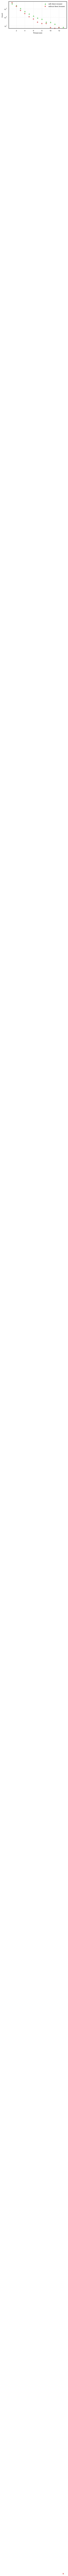

In [4]:
aq_with_BA = []
aq_without_BA = []

n=14

for i in xrange(1,n):
    aq_without_BA.append(Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=True).filter(answercount=i).count())
    aq_with_BA.append(Posts.objects.using(db).filter(posttypeid=1).filter(acceptedanswerid__isnull=False).filter(answercount=i).count())

print aq_with_BA    
    

fig = plt.figure(figsize=(4, 2))
ax1 = fig.add_subplot(111)


ax1.scatter(x=range(1,n), 
            y=aq_with_BA, 
            label='with Best Answer', s=30, c='g', marker='^', clip_on=False)
ax1.scatter(x=range(1,n), 
            y=aq_without_BA, 
            label='without Best Answer', s=30, c='r', marker='+', clip_on=False)

ax1.set_yscale('log', nonposy='clip')

plt.xlabel('Thread-size', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.tick_params(axis='both', which='major', labelsize=8)

plt.grid(alpha=0.7, linestyle='dotted')
plt.legend(fontsize=8)
plt.tight_layout(pad=0.1)

for plot_format in PLOTS_FORMATS: 
    plt.savefig(PLOTS_PATH + 'thread_sizes_SPLIT' + plot_format)

# Threads length (all data)

In [5]:
# example: {'cooking':[1,2,1,2,5], 'webapps': [...] ....}
threads_length = dict()


os.write(1, db+"\n")

    
# STAGE 1: considering (only) actual threads (later must sum 1 for the question)
threads_length[db] = Posts.objects\
    .using(db)\
    .filter(posttypeid=2)\
    .values('parentid')\
    .annotate(thread_len_part=Count('parentid'))\
    .values_list('thread_len_part', flat=True)
# adding 1 to count the question
threads_length[db] = [x+1 for x in threads_length[db]]


# STAGE 2: considering (only) unanswered questions
# get ids of questions with answers
parent_questions_ids = Posts.objects\
    .using(db)\
    .filter(posttypeid=2)\
    .values_list('parentid', flat=True)\
    .distinct()
# count unanswered questions
unanswered_q_count = Posts.objects\
    .using(db)\
    .filter(posttypeid=1)\
    .exclude(id__in=parent_questions_ids)\
    .count()

# append unanswered q to total counting
threads_length[db] = threads_length[db] + [1 for i in range(unanswered_q_count)]

# Thread length VS Nr threads (all data)

In [6]:
# for each distinct value in [...] count its occurence, zip the result

t_length_count = dict()

# count occurences
bins = np.bincount(threads_length[db])
# remove zeros from bins
t_count = bins[np.nonzero(bins)]
# sorted threads sizes
t_sizes = np.unique(threads_length[db])

t_length_count[db] = {
    't_count': t_count,
    't_sizes': t_sizes
}

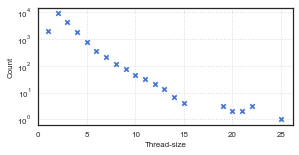

In [7]:
fig = plt.figure(figsize=(4,2))
ax1 = fig.add_subplot(111)

ax1.scatter(x=t_length_count[db]['t_sizes'], 
            y=t_length_count[db]['t_count'], 
            label=db, s=20, c='b', marker='x', clip_on=False)

#ax1.set_xscale('log', nonposx='clip')
ax1.set_yscale('log', nonposy='clip')
plt.xlabel('Thread-size', fontsize=8)
plt.ylabel('Count', fontsize=8)
#plt.title('', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=8)
ax1.set_xlim(xmin=0)
xmin, xmax = ax1.get_xlim()
ymin, ymax = ax1.get_ylim()


plt.grid(alpha=0.7, linestyle='dotted')
#plt.legend()
plt.tight_layout(pad=0.1)
for plot_format in PLOTS_FORMATS: 
    plt.savefig(PLOTS_PATH + 'thread_sizes_ALL' + plot_format)

# Nr answers and nr questions, per user (all data)

In [8]:
# note: ids are non-negative integers
users_activity = {
    'whole_data': {
        db: {
            # '1': {
            #     'nr_questions': -1,
            #     'nr_answers': -1
            # }   
        },
    }
}





    
# whole_data

# ex. [{'owneruserid': 17L, 'nr_questions': 13, 'nr_answers': 12}, {...}, {...}]
whole_d_vals = Posts.objects.using(db)\
    .order_by()\
    .values('owneruserid')\
    .distinct()\
    .annotate(
        nr_questions=Sum(
        Case(When(posttypeid=1, then=Value(1)),
             default=Value(0),
             output_field=IntegerField())),
        nr_answers=Sum(
        Case(When(posttypeid=2, then=Value(1)),
             default=Value(0),
             output_field=IntegerField()))
    )

data = dict()
for val in whole_d_vals:
    # owneruserid == None if user has been deleted, -1 for wiki entries, see http://meta.stackexchange.com/questions/2677/database-schema-documentation-for-the-public-data-dump-and-sede
    if val['owneruserid'] >= 1:
        data[val['owneruserid']] = {'nr_questions': val['nr_questions'], 'nr_answers': val['nr_answers']}
users_activity['whole_data'][db] = data



    
# extract: each data point is a user, x is #questions, y is #answers

# whole data
whole_d = pd.DataFrame.from_dict(users_activity['whole_data'][db], orient='index')

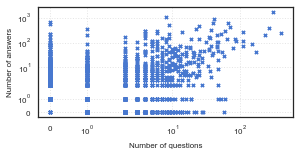

In [9]:
# scatter plots

fig = plt.figure(figsize=(4, 2))
#fig.suptitle("#answers vs #questions, per user", fontsize=18)

ax1 = fig.add_subplot(111)
ax1.set_xscale('symlog', nonposx='clip')
ax1.set_yscale('symlog', nonposx='clip')
ax1.scatter(x=whole_d['nr_questions'], 
            y=whole_d['nr_answers'], 
            label='travel', s=10, c='b', marker='x')
plt.xlabel('Number of questions', fontsize=8)
plt.ylabel('Number of answers', fontsize=8)
#plt.title('Users activity', fontsize=8)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.grid(alpha=0.5, linestyle='dotted')


plt.tight_layout(pad=0.1)
for plot_format in PLOTS_FORMATS: 
    plt.savefig(PLOTS_PATH + 'nr_answers_VS_nr_questions_scatter_ALL' + plot_format)

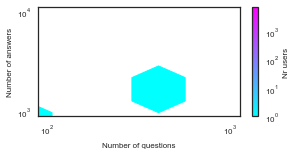

In [10]:
# hex bins

gridsize = 10

fig = plt.figure(figsize=(4, 2))
#fig.suptitle("#answers vs #questions, per user", fontsize=18)

ax1 = fig.add_subplot(111, sharey=ax1, sharex=ax1)
hb = ax1.hexbin(x=whole_d['nr_questions'].replace(0, 0.5), 
                y=whole_d['nr_answers'].replace(0, 0.5), 
                xscale='log', 
                yscale='log',
                norm=matplotlib.colors.LogNorm(),
                label=db,
                cmap='cool',
                gridsize=gridsize,
                mincnt=1)
#ax1.axis([0.5, whole_d_cooking['nr_questions'].max(), 0.5, whole_d_cooking['nr_answers'].max()])
cb = fig.colorbar(hb, ax=ax1)
cb.set_label('Nr users', fontsize=8)
cb.ax.tick_params(labelsize=8)
plt.xlabel('Number of questions', fontsize=8)
plt.ylabel('Number of answers', fontsize=8)
plt.tick_params(axis='both', which='major', labelsize=8)
#plt.title(db, fontsize=18)




plt.tight_layout(pad=0.1)
for plot_format in PLOTS_FORMATS: 
    plt.savefig(PLOTS_PATH + 'nr_answers_VS_nr_questions_2dhist_ALL' + plot_format)